In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import sqlite3
import numpy as np

import seaborn as sns


In [2]:
file_name = "../datasets/nepali_tweets_dataset_labelled_tweets_feb_23.csv"
pseudo_tweets_filename = "../datasets/pseudo_tweet.csv"


In [3]:
df = pd.read_csv(file_name, usecols=range(1, 9))

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12241 entries, 0 to 12240
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   covid_stats               12241 non-null  int64
 1   vaccination               12241 non-null  int64
 2   covid_politics            12241 non-null  int64
 3   humour                    12241 non-null  int64
 4   lockdown                  12241 non-null  int64
 5   civic_views               12241 non-null  int64
 6   life_during_pandemic      12241 non-null  int64
 7   covid_waves_and_variants  12241 non-null  int64
dtypes: int64(8)
memory usage: 765.2 KB


In [5]:
df.head()


,covid_stats,vaccination,covid_politics,humour,lockdown,civic_views,life_during_pandemic,covid_waves_and_variants
0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,1,0,0,0,1,0,0


In [6]:
df.describe()


,covid_stats,vaccination,covid_politics,humour,lockdown,civic_views,life_during_pandemic,covid_waves_and_variants
count,12241.000000,12241.000000,12241.000000,12241.000000,12241.000000,12241.000000,12241.000000,12241.000000
mean,0.165509,0.333633,0.208970,0.133404,0.131035,0.228413,0.146393,0.140756
std,0.371655,0.471530,0.406589,0.340025,0.337452,0.419827,0.353514,0.347784
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
conn = sqlite3.connect("/mnt/SSD0/rabin/EpiSuS/server/db.sqlite3")
pseudo_df = pd.read_sql_query("SELECT * from pseudo_tweet", conn)

In [8]:
pseudo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90760 entries, 0 to 90759
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        90760 non-null  int64 
 1   text                      90760 non-null  object
 2   username                  90760 non-null  object
 3   created_at                90760 non-null  object
 4   covid_stats               90760 non-null  int64 
 5   vaccination               90760 non-null  int64 
 6   covid_politics            90760 non-null  int64 
 7   humour                    90760 non-null  int64 
 8   lockdown                  90760 non-null  int64 
 9   civic_views               90760 non-null  int64 
 10  life_during_pandemic      90760 non-null  int64 
 11  covid_waves_and_variants  90760 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 8.3+ MB


In [9]:
pseudo_df.drop(["id", "username", "created_at", "text"], axis=1, inplace=True)

In [12]:
frames = [df, pseudo_df]
combined_df = pd.concat(frames)

In [15]:
combined_df

,covid_stats,vaccination,covid_politics,humour,lockdown,civic_views,life_during_pandemic,covid_waves_and_variants
0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
90755,0,0,0,1,0,0,0,0
90756,1,0,0,0,0,0,0,0
90757,0,0,0,0,0,0,0,0
90758,0,1,0,0,0,0,0,0


In [17]:
df_sum = df.sum()
df_sum


covid_stats                 2026
vaccination                 4084
covid_politics              2558
humour                      1633
lockdown                    1604
civic_views                 2796
life_during_pandemic        1792
covid_waves_and_variants    1723
dtype: int64

In [16]:
combined_df_sum = combined_df.sum()
combined_df_sum

covid_stats                 29656
vaccination                 32631
covid_politics              18643
humour                      11770
lockdown                     4439
civic_views                 23675
life_during_pandemic        15372
covid_waves_and_variants     5978
dtype: int64

In [37]:
import glob

files = glob.glob("../datasets/annotators/*.csv")
dfs = [pd.read_csv(f, usecols=range(2, 10)) for f in files]
annotators_df = pd.concat(dfs,ignore_index=True)

In [38]:
annotators_sum = annotators_df.sum()
annotators_sum

covid_stats                 138
vaccination                 135
covid_politics               61
humour                       14
lockdown                     23
civic_views                  33
life_during_pandemic         26
covid_waves_and_variants     30
dtype: int64

<AxesSubplot:>

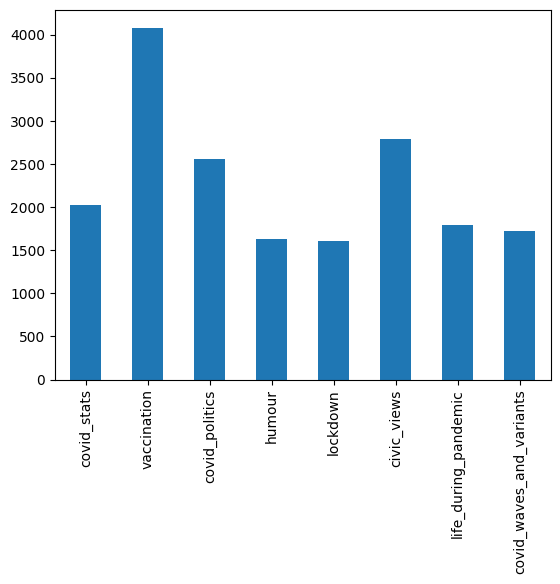

In [39]:
df_sum.plot.bar()


In [40]:
df_sum.index.str.replace("_", " ").str.title()


Index(['Covid Stats', 'Vaccination', 'Covid Politics', 'Humour', 'Lockdown',
       'Civic Views', 'Life During Pandemic', 'Covid Waves And Variants'],
      dtype='object')

In [19]:
labels = (
        "Covid Stats",
        "Vaccination",
        "Covid Politics",
        "Humour",
        "Lockdown",
        "Civic Views",
        "Life during Pandemic",
        "Waves and Variants",
    )
labels


('Covid Stats',
 'Vaccination',
 'Covid Politics',
 'Humour',
 'Lockdown',
 'Civic Views',
 'Life during Pandemic',
 'Waves and Variants')

In [42]:
df_sum.index = labels

<BarContainer object of 8 artists>

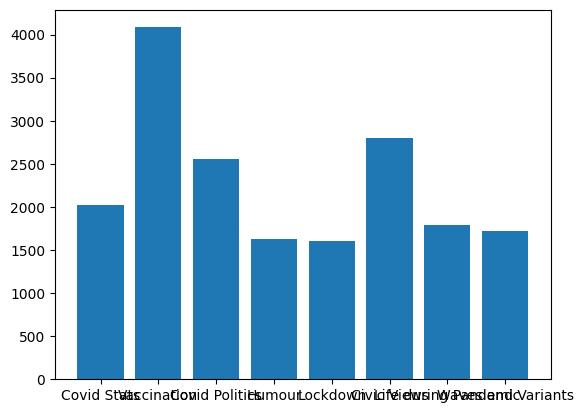

In [43]:
plt.bar(labels, df_sum)


In [23]:
savefig_kwargs = dict(bbox_inches="tight", pad_inches=0, transparent=True)


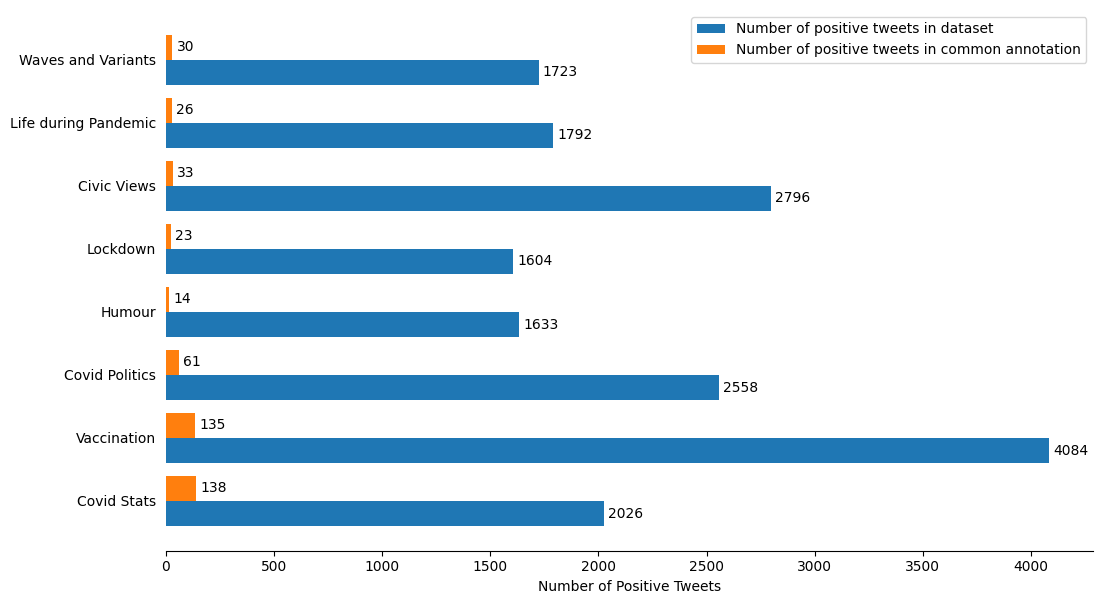

In [62]:
# plt.rcParams["font.family"] = "serif"
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(labels))
width = 0.4

plt.tight_layout()
rects1 = ax.barh(x - width/2, df_sum, width, label="Number of positive tweets in dataset")
rects2 = ax.barh(x + width/2, annotators_sum, width, label="Number of positive tweets in common annotation")
# plt.bar_label(rects1)
ax.set_xlabel("Number of Positive Tweets")
ax.set_yticks(x, labels)

ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

plt.tick_params(axis="y", left=False)
gca = plt.gca()
gca.spines["right"].set_visible(False)
gca.spines["top"].set_visible(False)
gca.spines["left"].set_visible(False)

plt.savefig("distribution.pdf", **savefig_kwargs)
plt.savefig("distribution.png", **savefig_kwargs)


AttributeError: 'Rectangle' object has no property 'cmap'

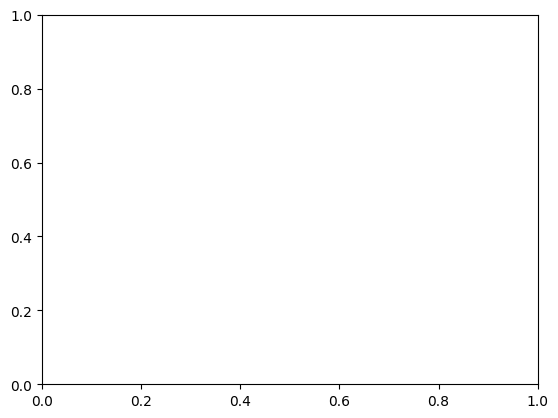

In [46]:
sns.barplot(x=df_sum, y=df_sum.index, orient="h", cmap="husl")
plt.xlabel("Number of Positive Tweets")
plt.tick_params(axis="y", left=False)
gca = plt.gca()
gca.spines["right"].set_visible(False)
gca.spines["top"].set_visible(False)
gca.spines["left"].set_visible(False)

In [ ]:
corr = df.corr()
corr.index = labels
corr.columns = labels
corr


,Covid Stats,Vaccination,Covid Politics,Humour,Lockdown,Civic Views,Life during Pandemic,Waves and Variants
Covid Stats,1.000000,-0.296008,-0.217546,-0.165683,-0.133853,-0.209321,-0.157692,-0.084175
Vaccination,-0.296008,1.000000,0.348825,-0.056471,-0.253206,0.072703,-0.216079,-0.191730
Covid Politics,-0.217546,0.348825,1.000000,-0.106518,-0.109676,0.096548,-0.112245,-0.127718
Humour,-0.165683,-0.056471,-0.106518,1.000000,-0.002834,0.021749,0.032583,-0.069678
Lockdown,-0.133853,-0.253206,-0.109676,-0.002834,1.000000,0.047072,0.176819,-0.059710
Civic Views,-0.209321,0.072703,0.096548,0.021749,0.047072,1.000000,0.114326,-0.007585
Life during Pandemic,-0.157692,-0.216079,-0.112245,0.032583,0.176819,0.114326,1.000000,0.037720
Waves and Variants,-0.084175,-0.191730,-0.127718,-0.069678,-0.059710,-0.007585,0.037720,1.000000


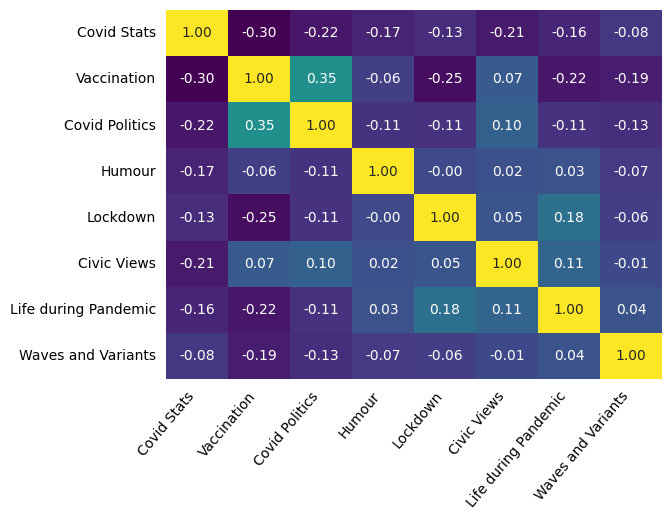

In [ ]:
import seaborn as sns

plt.tight_layout()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis", cbar=False)
plt.tick_params(axis="both", left=False, bottom=False)
plt.xticks(rotation=50, ha="right")
plt.savefig("correlation.pdf", **savefig_kwargs)
plt.savefig("correlation.png", **savefig_kwargs)


In [21]:
combined_corr = combined_df.corr()
combined_corr.index = labels
combined_corr.columns = labels
combined_corr

,Covid Stats,Vaccination,Covid Politics,Humour,Lockdown,Civic Views,Life during Pandemic,Waves and Variants
Covid Stats,1.000000,-0.414707,-0.292690,-0.224554,-0.113301,-0.318334,-0.238043,-0.039633
Vaccination,-0.414707,1.000000,0.308127,-0.037571,-0.116460,0.113122,-0.257039,-0.125385
Covid Politics,-0.292690,0.308127,1.000000,-0.103939,-0.002167,0.085097,-0.116080,-0.081317
Humour,-0.224554,-0.037571,-0.103939,1.000000,0.090879,0.172963,0.030697,-0.027684
Lockdown,-0.113301,-0.116460,-0.002167,0.090879,1.000000,0.048371,0.100429,-0.002174
Civic Views,-0.318334,0.113122,0.085097,0.172963,0.048371,1.000000,0.113504,-0.003065
Life during Pandemic,-0.238043,-0.257039,-0.116080,0.030697,0.100429,0.113504,1.000000,0.047991
Waves and Variants,-0.039633,-0.125385,-0.081317,-0.027684,-0.002174,-0.003065,0.047991,1.000000


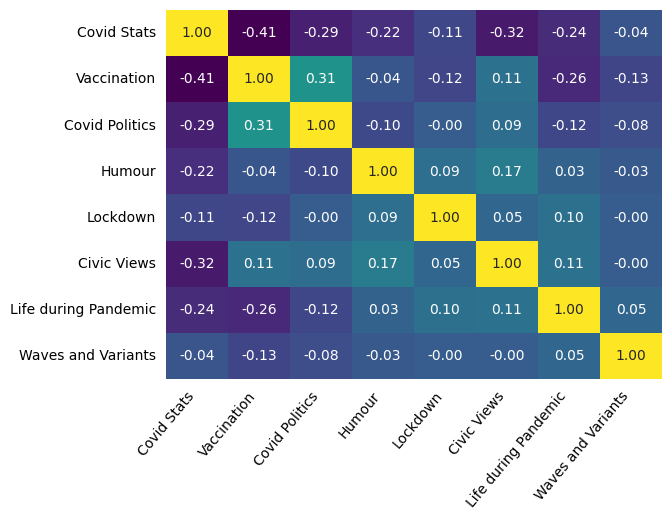

In [24]:
plt.tight_layout()
sns.heatmap(combined_corr, annot=True, fmt=".2f", cmap="viridis", cbar=False)
plt.tick_params(axis="both", left=False, bottom=False)
plt.xticks(rotation=50, ha="right")
plt.savefig("pseudo_correlation.pdf", **savefig_kwargs)
plt.savefig("pseudo_correlation.png", **savefig_kwargs)